### 0. Data Loading

프로젝트 폴더에서 데이터를 불러온다 

In [2]:
import re
import pandas as pd
import numpy as np 
import json
from nltk.corpus import stopwords


dataOutPath='./data_out/'
File = 'train_all.csv'
#testFile = 'FDOT-clean.csv'

Input = pd.read_csv(dataOutPath+File)
#testInput = pd.read_csv(dataOutPath+testFile)

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
Input.head()


,clauses,label
0,inform must submit least month bid due via wor...,1
1,obtain certif construct industri licens board ...,1
2,submit copi agreement document,0
3,determin quantiti type equip work necessari se...,1
4,dirt plant foreign materi remov dirt plant for...,0


In [7]:
test_data = Input['clauses'][:414]
test_label = Input['label'][:414]

train_data = Input['clauses'][415:]
train_label = Input['label'][415:]

train_data_df = pd.DataFrame(data = {"clauses": train_data, "label":train_label})
train_data_df.to_csv(dataOutPath+'train_data.csv')

test_data_df = pd.DataFrame(data = {"clauses": test_data, "label":test_label})
test_data_df.to_csv(dataOutPath+'test_data.csv')

 ### 2. CounterVectorizer를 활용한 벡터화 
 모델 구현에 앞서 모델에 사용할 입력값을 정해야 한다. TF-IDF, word2Vec 등을 활용해서 벡터화한 데이터를 입력값으로 사용할 수도 있고. 이번에는 counterVectorizer를 사용해서 입력값을 만들자. 
 
**주의할점은, 테스트 데이터를 벡터화 할때도 트레이닝 데이터의 vectorizer를 사용해야한다.**


### stemming data code

In [8]:
from sklearn.feature_extraction.text import CountVectorizer 

#트레이닝셋 벡터화
vectorizer = CountVectorizer(analyzer="word", max_features=1000)
train_vec = vectorizer.fit_transform(train_data)
train_label= np.array(train_label)

#테스트셋에 transform  
test_vec = vectorizer.transform(test_data)


In [9]:
print("Training set featues: ",train_vec.shape)
print("label feature: ",train_label.shape)

Training set featues:  (1659, 1000)
label feature:  (1659,)


### 3. 훈련데이터와 검증데이터 나누기

전체 훈련데이터에 사용되는 문장 4049개를  t_size 비율만큼 훈련:검증 데이터로 나눈다. 
sklearn의 train_test_split 함수를 사용해서 자동으로 분할한다. 

In [10]:
from sklearn.model_selection import train_test_split

t_size=0.2 
r_seed=26

stem_train, eval_stem, stem_lb, eval_stlb = train_test_split(train_vec, train_label, test_size=t_size, random_state=r_seed )
stem_train.shape

(1327, 1000)

### 4. 랜덤포레스트 분류

- RandomForestClassifier 는 sklearn의 ensemble  라이브러리에서 제공한다. 
- forest라는 이름으로 분류기 객체를 생성하고, n_estimators 변수로 결정트리의 개수를 지정한다. 
- forest.fit 함수의 인자로 훈련 데이터와 레이블을 주입한다. 
- 검증데이터셋 (eval_cl, eval_lb)로 분류정확도를 측정한다. 


In [11]:
from sklearn.ensemble import RandomForestClassifier 

forest_stem = RandomForestClassifier(n_estimators=100)

forest_stem.fit(stem_train, stem_lb)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
for feature, score in zip(stem_train, forest_stem.feature_importances_):
    print(feature, score)

  (0, 288)	1
  (0, 942)	1
  (0, 988)	1
  (0, 969)	1
  (0, 694)	1
  (0, 61)	1
  (0, 646)	2
  (0, 639)	1
  (0, 573)	1
  (0, 695)	1
  (0, 493)	1
  (0, 571)	1
  (0, 419)	1
  (0, 252)	1 8.704244553042393e-05
  (0, 128)	1
  (0, 521)	2
  (0, 623)	1
  (0, 170)	1 2.4723033049797705e-05
  (0, 880)	1
  (0, 945)	1
  (0, 795)	2
  (0, 696)	1
  (0, 762)	1
  (0, 307)	1
  (0, 759)	1
  (0, 571)	1
  (0, 81)	2
  (0, 698)	1
  (0, 697)	1
  (0, 965)	1
  (0, 458)	1
  (0, 186)	1 4.8169514762986827e-05
  (0, 288)	1
  (0, 720)	1
  (0, 991)	1
  (0, 996)	1
  (0, 173)	1
  (0, 58)	1
  (0, 718)	1
  (0, 684)	1
  (0, 632)	1 0.00014618216634980347
  (0, 720)	1
  (0, 58)	1
  (0, 944)	1
  (0, 367)	1
  (0, 520)	1 0.048535184618724775
  (0, 182)	1
  (0, 991)	1
  (0, 878)	2
  (0, 630)	1
  (0, 716)	1
  (0, 192)	1
  (0, 20)	1
  (0, 718)	1
  (0, 559)	1 0.0005380627406193796
  (0, 789)	1
  (0, 859)	1
  (0, 991)	1
  (0, 181)	1
  (0, 173)	1
  (0, 9)	1
  (0, 90)	1
  (0, 784)	1
  (0, 188)	1
  (0, 668)	1
  (0, 211)	1
  (0, 84)	1
  (0

  (0, 663)	1 0.0010401149151331877
  (0, 182)	1
  (0, 751)	1
  (0, 4)	1
  (0, 789)	2
  (0, 898)	2
  (0, 425)	1
  (0, 630)	1
  (0, 58)	1
  (0, 645)	1
  (0, 711)	2
  (0, 9)	1
  (0, 285)	1
  (0, 55)	1
  (0, 183)	2
  (0, 777)	2
  (0, 888)	1 0.000529357515314747
  (0, 231)	1
  (0, 521)	1
  (0, 751)	1
  (0, 623)	2
  (0, 173)	4
  (0, 508)	1
  (0, 886)	1
  (0, 588)	2
  (0, 793)	1
  (0, 235)	1
  (0, 90)	1
  (0, 314)	1
  (0, 718)	1
  (0, 86)	4
  (0, 763)	1
  (0, 613)	2
  (0, 36)	1
  (0, 193)	1
  (0, 619)	4
  (0, 440)	1 0.00010911085091372246
  (0, 58)	1
  (0, 887)	1
  (0, 944)	1
  (0, 531)	3
  (0, 997)	1
  (0, 203)	2 0.0010098672390748105
  (0, 288)	1
  (0, 231)	1
  (0, 4)	1
  (0, 859)	1
  (0, 991)	3
  (0, 996)	1
  (0, 645)	2
  (0, 837)	1
  (0, 887)	1
  (0, 944)	2
  (0, 384)	3
  (0, 159)	1
  (0, 557)	1
  (0, 768)	1
  (0, 211)	1
  (0, 667)	1
  (0, 165)	1
  (0, 480)	1 0.00035488202445403975
  (0, 859)	1
  (0, 265)	1
  (0, 425)	1
  (0, 712)	2
  (0, 347)	1
  (0, 568)	1
  (0, 937)	1
  (0, 209)	1
  (0

  (0, 521)	1
  (0, 991)	3
  (0, 181)	1
  (0, 878)	1
  (0, 630)	1
  (0, 155)	2
  (0, 376)	1
  (0, 9)	1
  (0, 237)	1
  (0, 558)	1
  (0, 298)	1
  (0, 233)	1
  (0, 314)	1
  (0, 474)	1
  (0, 170)	1
  (0, 921)	1
  (0, 911)	1
  (0, 666)	1
  (0, 868)	1 3.9670602656581705e-07
  (0, 231)	1
  (0, 688)	2
  (0, 859)	1
  (0, 361)	1
  (0, 517)	1
  (0, 55)	1
  (0, 52)	1
  (0, 552)	1
  (0, 82)	1
  (0, 750)	1
  (0, 968)	1
  (0, 943)	1
  (0, 306)	1 0.00021918181045669653
  (0, 182)	1
  (0, 623)	1
  (0, 493)	1
  (0, 937)	1
  (0, 855)	1
  (0, 54)	1
  (0, 629)	1
  (0, 628)	1
  (0, 601)	1 0.0002883460355872799
  (0, 751)	1
  (0, 991)	1
  (0, 181)	1
  (0, 173)	1
  (0, 852)	1
  (0, 19)	1
  (0, 965)	1
  (0, 557)	1
  (0, 976)	1
  (0, 424)	1
  (0, 349)	1 0.0005025555841748671
  (0, 751)	1
  (0, 181)	1
  (0, 265)	1
  (0, 450)	1
  (0, 645)	1
  (0, 828)	1
  (0, 611)	1
  (0, 826)	1
  (0, 586)	1
  (0, 705)	1
  (0, 580)	2
  (0, 96)	1
  (0, 904)	1 0.00029616049561035767
  (0, 182)	1
  (0, 800)	1
  (0, 991)	1
  (0, 181)	

In [13]:
print("Accuracy of training: %f" % forest_stem.score(stem_train, stem_lb))
print("Accuracy of validation: %f" % forest_stem.score(eval_stem, eval_stlb))

Accuracy of training: 1.000000
Accuracy of validation: 0.933735


### 4.1 분류결과 
- n_estimators =n 일때, n 값이 커질수록 정확도가 향상됨을 알 수 있다. 
- n=100 일때 accuracy = 95% 달성 

- lema 보다 stemming 했을때 더 정확도가 높게 나옴 

In [14]:
from sklearn.metrics import confusion_matrix
y_pred = forest_stem.predict(eval_stem)
cm = confusion_matrix(eval_stlb, y_pred)
cm

array([[127,  14],
       [  8, 183]], dtype=int64)

Text(69,0.5,'Truth')

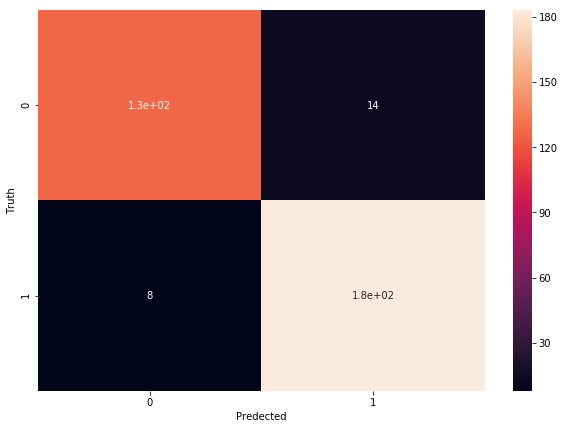

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predected')
plt.ylabel('Truth')

In [17]:
import os 
# 테스트 데이터 파일에 쓰기 -

DATA_OUT_PATH='./data_out/results/'

if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)
    
# 위에서 만든 랜덤 포레스트 분류기를 통해 예측값을 가져온다.
result = forest_stem.predict(test_vec)

# 판다스 데이터 프레임을 통해 데이터를 구성해서 output에 넣는다.
output = pd.DataFrame( data={"label": test_label,  "predict": result} )

# 이제 csv파일로 만든다.
output.to_csv(DATA_OUT_PATH + "predict-counterVec-1126.csv", index=False, quoting=3 )